In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data['SeniorCitizen']=pd.Categorical(data['SeniorCitizen']) 
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors="coerce") 
data.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [6]:
del data["customerID"] 
data.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [7]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data = data.dropna() 
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
numerics = ['float64', 'int64']
numeric_ds = data.select_dtypes(include=numerics) 
objects_ds = data.select_dtypes(exclude=numerics)

In [10]:
numeric_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   MonthlyCharges  7032 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 219.8 KB


In [11]:
numeric_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [12]:
objects_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  Churn             7032 n

In [13]:
objects_ds.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [14]:
data.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

In [15]:
#Analysing The Numerical DATA

[]

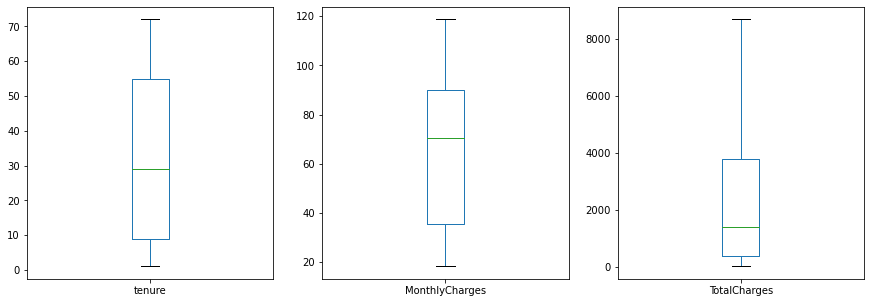

In [17]:
# box plots
numeric_ds.plot(kind='box', subplots=True, figsize=(15,5)) 
plt.plot()

[]

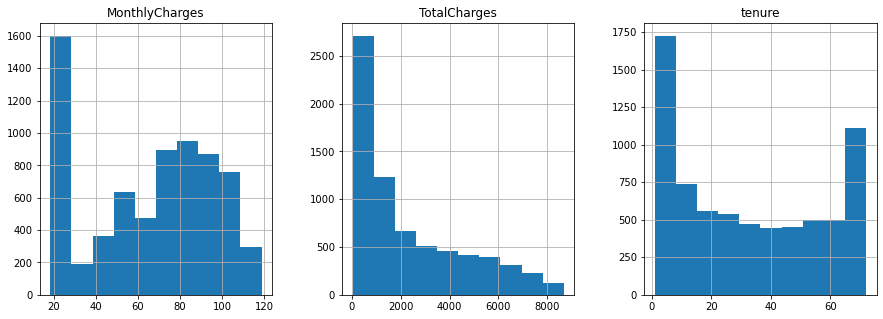

In [18]:
# histogram plots 
numeric_ds.hist(layout=(1,3), figsize=(15,5)) 
plt.plot()

In [19]:
#Now Lets Compare the each numeric values with churn(our prediction Variable) 
#lets add the churn variable to dataset
numeric_ds = pd.concat([numeric_ds,data["Churn"]],axis=1)

In [20]:
numeric_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   MonthlyCharges  7032 non-null   float64
 2   TotalCharges    7032 non-null   float64
 3   Churn           7032 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 274.7+ KB


In [21]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


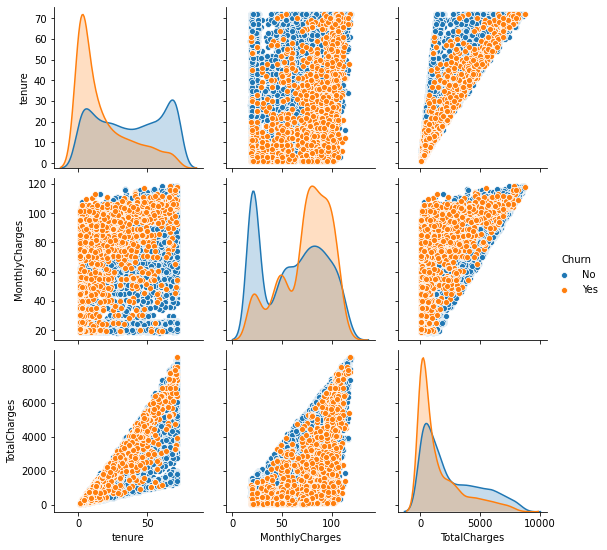

In [22]:
sns.pairplot(numeric_ds,hue='Churn')

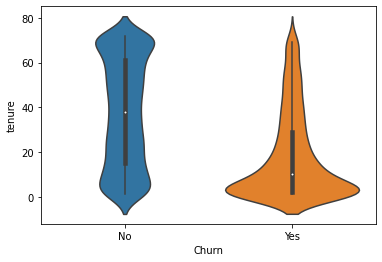

In [23]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

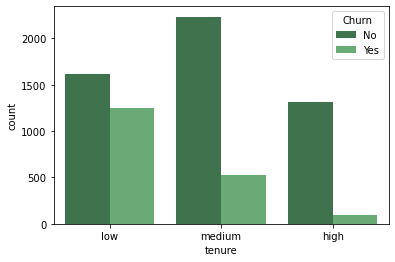

In [24]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium', 'high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

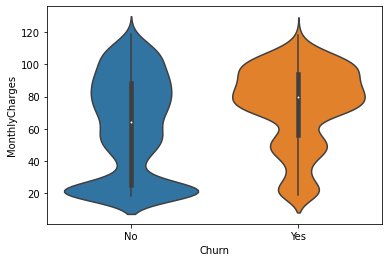

In [25]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

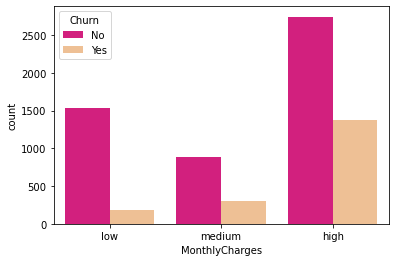

In [27]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels
=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Accent_r");

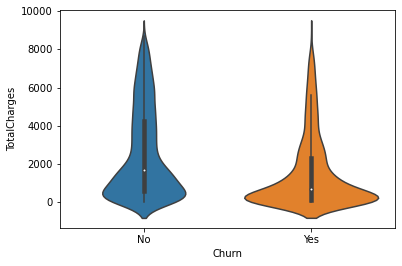

In [28]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

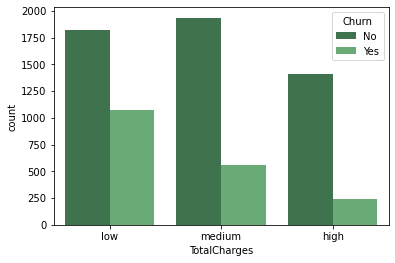

In [32]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

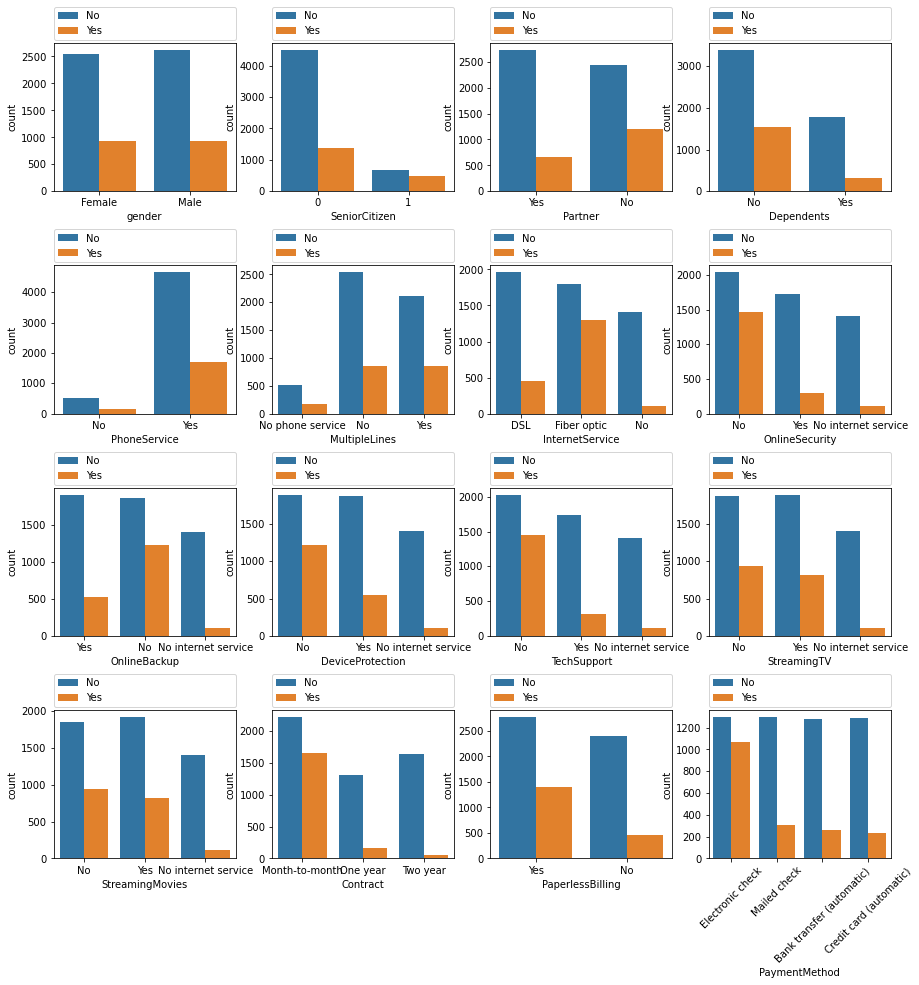

In [44]:
fig,ax =plt.subplots(4,4,figsize=(15,15)) 
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod (i,4)])
    
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) 

for tick in ax[3,3].get_xticklabels(): 
    
    tick.set_rotation(45)

In [45]:
bins=pd.DataFrame([tenure_bins,	MonthlyCharges_bins,TotalCharges_bins]).T

In [46]:
bins

,tenure,MonthlyCharges,TotalCharges
0,low,low,low
1,medium,medium,medium
2,low,medium,low
3,medium,medium,medium
4,low,high,low
...,...,...,...
7038,medium,high,medium
7039,high,high,high
7040,low,low,low
7041,low,high,low


C:\Users\harsh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


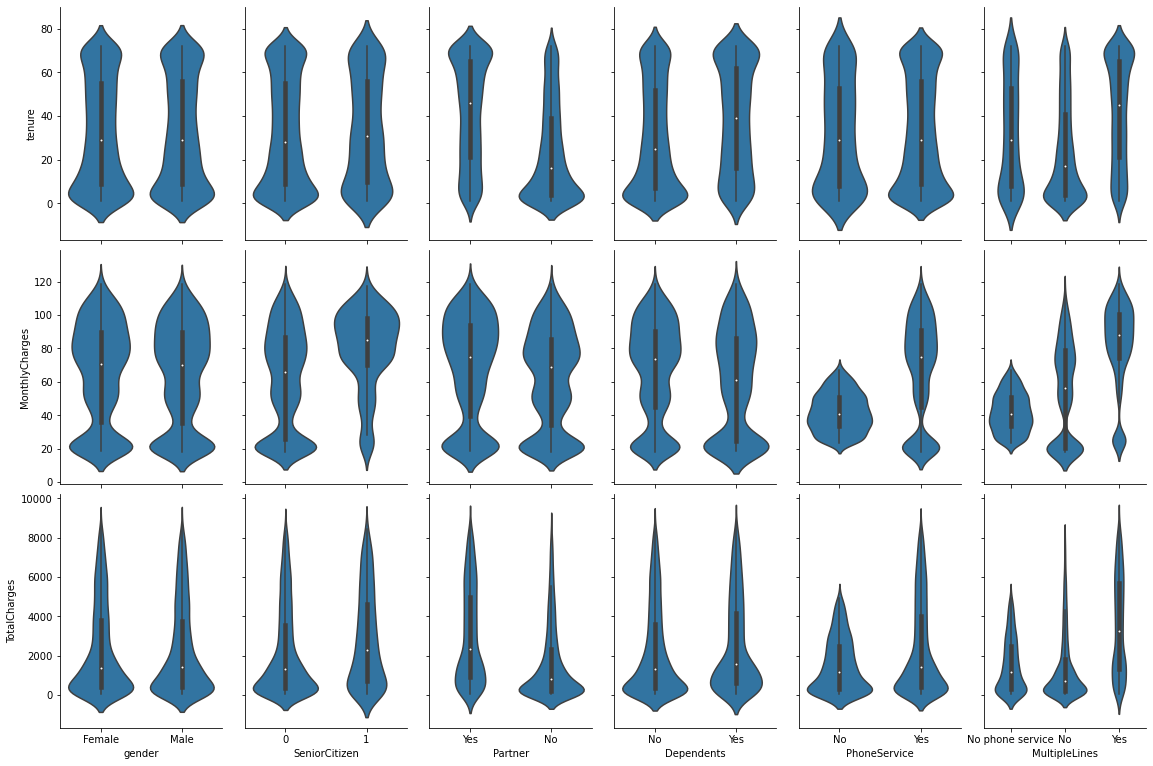

In [47]:
g = sns.PairGrid(data, x_vars=objects_ds.columns[0:6].values, y_vars=numeric_ds.columns[0:3].values, aspect=.75, size=3.5)
g.map(sns.violinplot);
